<IPython.core.display.Javascript object>


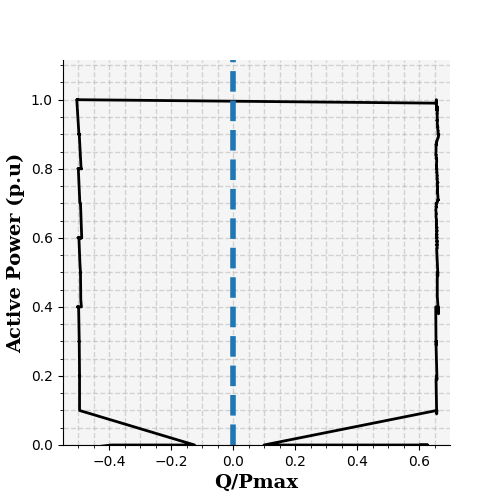

Text(0.5, 0, 'Q/Pmax')

In [11]:
p=[data['P/P'][i] for i in reversed(range(360))]
p=p+data['P/P'][360:].tolist()
q=[data['Q/P'][i] for i in reversed(range(360))]
q=q+data['Q/P'][360:].tolist()
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(q,f,label='V(Q)',linewidth=2,c='k')
# l2 = ax.plot(data['Q/Pmax'],0.85*np.ones(len(data['V(p.u)'])),linewidth=2,c=l1[0].get_color())
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


<IPython.core.display.Javascript object>


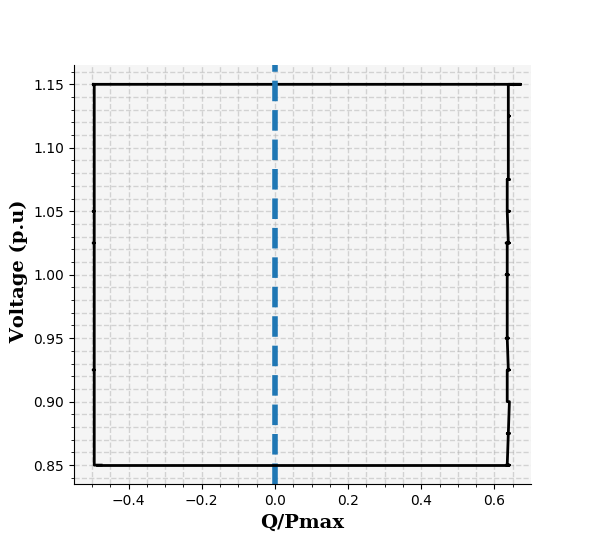

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(data['Q/Pmax'],data['V(p.u)'],label='V(Q)',linewidth=2,c='k')
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=0.85,xmin=0.05,xmax=0.95,linewidth=2, ls='-',c='k')

In [1]:
from plot_maplot_v1 import *
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)

Please enter the path of you csv file:/home/skont/Data/Kazakstan/mkat_24_01.csv


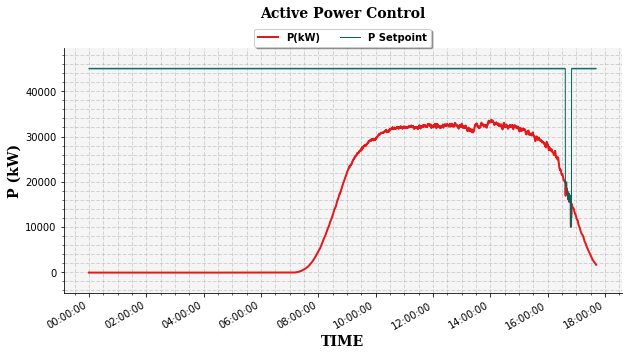

In [3]:
fig,axes,lines,leg= plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,0],en['P'].iloc[:,0],200)

In [8]:
axes[0].set_xlim([datetime.datetime(1900, 1, 1,10,0,0), datetime.datetime(1900, 1, 1,12,0,0)])

(693596.4166666666, 693596.5)

In [4]:
from netCDF4 import num2date
axes[0].get_xlim()

(693595.9631394676, 693596.7743258101)

In [7]:
import matplotlib as mpl
md

In [11]:
str(mpl.dates.num2date(693596.7743258101))

'1900-01-01 18:35:01.750000+00:00'

In [12]:
datetime.datetime.strptime(str(mpl.dates.num2date(693596.7743258101)), '%H:%M:%S')

ValueError: time data '1900-01-01 18:35:01.750000+00:00' does not match format '%H:%M:%S'

In [14]:
for c in s['P'].columns:
    print(c)

apc:PSP0


In [1]:
import tkinter as tk
from tkinter import font
from plot_maplot_v1 import *
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)

Please enter the path of you csv file:/media/spiros/my_data/Kazakstan/M_KAT/mkat_24_01.csv


In [20]:
# import tkFont
plots=dict()
i=1
for k in en.keys():
    if int(en[k].sum())!=0:
        plots[str(i)]=k
        i=i+1
if ('P' in en.keys())&('Q' in en.keys()):
    plots[str(i)]='Q Capability'
    i=i+1
plots[str(i)]="All Measurements"
choose_plot = tk.Tk()
choose_plot.resizable(width=False, height=False)
# choose_plot.protocol("WM_DELETE_WINDOW",destroyer)
choose_plot.title("Available Plots")
choose_plot.geometry("")
for k,v, in plots.items():
    # print(k,")",v)
    b=tk.Button(choose_plot,text=v)
    # buttons.append(b)
    b.config(command= lambda btn=b: plot_choise(btn))
    b.grid(row=0,column=i)
    i=i+1
w= choose_plot.winfo_reqwidth()
header_frame = tk.Frame(choose_plot)
header_frame.grid(row=1,columnspan=i)
header=tk.Label(header_frame,text="Traces Found")
f = tk.font.Font(header, header.cget("font"))
f.configure(underline=True)
header.configure(font=f)
header.pack()
headings=['Measurements','Setpoints','Enabled/Disabled']
headings_frame = tk.Frame(choose_plot)
headings_frame.grid(row=2,columnspan=i)
for col,entry in enumerate(headings):
    heading = tk.Label(headings_frame,text=entry)
    heading.grid(row=0,column=col,padx=w/10)
    f = tk.font.Font(heading, heading.cget("font"))
    f.configure(underline=True)
    heading.configure(font=f)
traces_frame=tk.Frame(choose_plot,borderwidth = 1)
traces_frame.grid(row=3,columnspan=i)

r=0
for key in m.keys():
    for c in m[key].columns:
        tk.Label(traces_frame,text=c).grid(row=r,column=0)
        r+=1
r=0
for key in s.keys():
    for c in s[key].columns:
        tk.Label(traces_frame,text=c).grid(row=r,column=1,padx=w/3.2)
        r+=1
r=0
for key in en.keys():
    for c in en[key].columns:
        tk.Label(traces_frame,text=c).grid(row=r,column=2)
        r+=1

quit_button=tk.Button(choose_plot,text='Quit')
quit_button.grid(columnspan=i,pady=10)
choose_plot.mainloop()

In [62]:
choose_plot.winfo_reqwidth?

In [11]:
s['P'].columns[1]

'apc:PSP0_eff'

In [9]:
import tkinter as tk
text = "text"
set_ytick=tk.Tk()
set_ytick.title("Y-ticks "+"("+text+")")

tick_y = tk.Label(set_ytick, text="Insert-tick spacing"+"("+text+")").grid(row=0)
e_ticky = tk.Entry(set_ytick,bd=5,width=20)
e_ticky.grid(row=0,column=1)

button_frame=tk.Frame(set_ytick)
button_frame.grid(row=1,pady=5)

quit_sel_ytick=tk.Button(button_frame, text='Quit')
quit_sel_ytick.grid(row=1, column=0)

apply_sel_ytick=tk.Button(button_frame, text='Apply')
apply_sel_ytick.grid(row=1, column=1)

auto_ticky= tk.Button(button_frame,text='Reset')
auto_ticky.grid(row=1,column=2)

set_ytick.mainloop()

In [1]:
import tkinter as tk
from tkinter import font
from plot_maplot_v1 import *
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)

Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


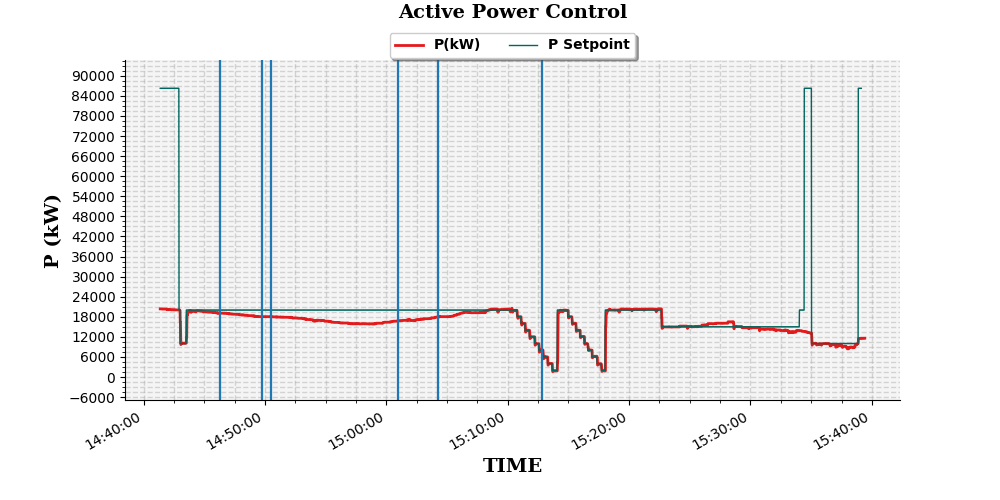

7

In [22]:
%matplotlib notebook
fig,axes,lines,leg= plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,0],en['P'].iloc[:,0],200)
for l in lines:
    l.set_picker(10)
def onpick(event):
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata
#         xax = event.artist
        L =  axes[0].axvline(x=x)
        print(x,y,type(x))
        fig.canvas.draw()
fig.canvas.mpl_connect('pick_event',onpick)

In [12]:
axes[0].xaxis

In [ ]:
lines[0].set_picker

In [ ]:
lines[0].pick

In [56]:
import numpy as np
mintick=axes[0].get_ylim()[0]
maxtick=axes[0].get_ylim()[-1]
_=axes[0].yaxis.set_ticks(np.arange(mintick, maxtick, 1000).round(-3))

In [57]:
axes[0].axvline

Object `axvline` not found.


In [ ]:
axes[0].axvline

In [51]:
a.round(-3)

array([ 1000,  2000,  2000,  2000,  3000,  4000,  4000,  4000,  5000,
        6000,  6000,  6000,  7000,  8000,  8000,  8000,  9000, 10000])

<IPython.core.display.Javascript object>


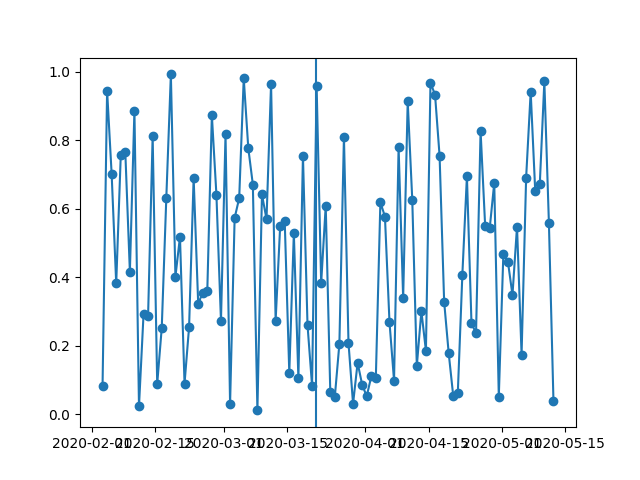

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate


class PointPicker(object):
    def __init__(self,dates,values):

        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)

        self.lines2d, = self.ax.plot_date(dates, values, linestyle='-',picker=5)

        self.fig.canvas.mpl_connect('pick_event', self.onpick)
        self.fig.canvas.mpl_connect('key_press_event', self.onpress)

    def onpress(self, event):
        """define some key press events"""
        if event.key.lower() == 'q':
            sys.exit()

    def onpick(self,event):
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata
        L =  self.ax.axvline(x=x)
        self.fig.canvas.draw()


if __name__ == '__main__':
    import numpy as np
    import datetime

    dates=[datetime.datetime.now()+i*datetime.timedelta(days=1) for i in range(100)]
    values = np.random.random(100)

    plt.ion()
    p = PointPicker(dates,values)
    plt.show()